In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [2]:
data = open('ultimate_data_challenge.json', 'r').readline()
data = json.loads(data)
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


Dropping all the users where the device name is missing, having this info seems crucial for phone identification and also for determining rider retention.

In [5]:
df.dropna(subset=['phone'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
city                      49604 non-null object
trips_in_first_30_days    49604 non-null int64
signup_date               49604 non-null object
avg_rating_of_driver      41578 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null object
phone                     49604 non-null object
surge_pct                 49604 non-null float64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49406 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [6]:
mean_rating_driver = round(df.avg_rating_of_driver.mean(),1)
mean_rating_rider = round(df.avg_rating_by_driver.mean(),1)

In [7]:
df['avg_rating_of_driver'].fillna(mean_rating_driver,inplace=True)
df['avg_rating_by_driver'].fillna(mean_rating_rider,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
city                      49604 non-null object
trips_in_first_30_days    49604 non-null int64
signup_date               49604 non-null object
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null object
phone                     49604 non-null object
surge_pct                 49604 non-null float64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


Filling the missing values in the average rating of the driver column with mean value, because the standard deviation is small.

In [8]:
df['signup_date'] = pd.to_datetime(df['signup_date'],infer_datetime_format=True)
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
city                      49604 non-null object
trips_in_first_30_days    49604 non-null int64
signup_date               49604 non-null datetime64[ns]
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null datetime64[ns]
phone                     49604 non-null object
surge_pct                 49604 non-null float64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.6+ MB


In [9]:
df['last_trip_date'].sort_values(ascending=False)

31587   2014-07-01
12085   2014-07-01
18814   2014-07-01
12139   2014-07-01
45516   2014-07-01
           ...    
3788    2014-01-01
31650   2014-01-01
33241   2014-01-01
26039   2014-01-01
38794   2014-01-01
Name: last_trip_date, Length: 49604, dtype: datetime64[ns]

It seems like the data was gathered after '2014-07-01' so it would be considered as the last date.Anyone having a signup date after 1st of june would be considered retained. 

In [10]:
df['retained'] = df['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

In [11]:
df['retained'].value_counts()

0    30933
1    18671
Name: retained, dtype: int64

The no. of users retained by ultimate inc. is just 37.6%

In [12]:
df.reset_index(inplace=True,drop=True)
df.drop('last_trip_date',axis=1,inplace=True)
df.drop('signup_date',axis=1,inplace=True)

'last trip date' and 'signup date' features are dropped from the dataframe as they dont seem important.

In [13]:
df.head(10)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,3.5,1.00,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,4.6,1.00,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,5.0,1.00,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,4.5,1.00,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,4.6,1.00,Android,0.0,False,0.0,2.37,5.0,0


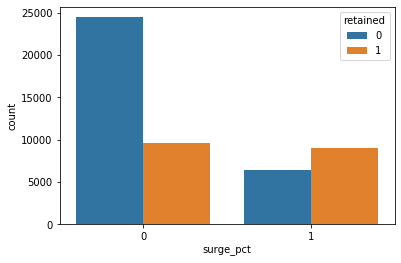

In [14]:
surge = df['surge_pct'].apply(lambda x: 1 if x > 0.0 else 0)
sns.countplot(x=surge,data=df, hue='retained')

It seems paying a surge amount doesn't have any effect on rider churning with almost similar no. of riders who paid surge amt and the ones who didn't.

In [15]:
df['phone'] = df['phone'].apply(lambda x: 1 if x == 'iPhone' else 0)
df['ultimate_black_user'] = df['ultimate_black_user'].apply(lambda x: 1 if x else 0)

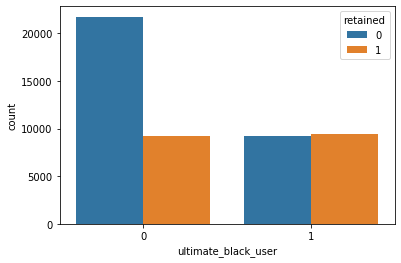

In [16]:
sns.countplot(x='ultimate_black_user', data=df, hue='retained')

Ultimate black Users makeup nearly half of the users that were retained.

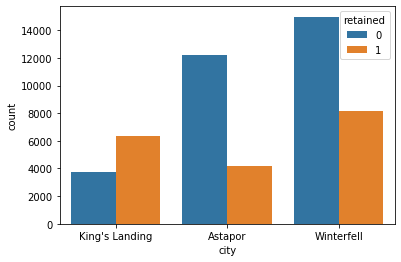

In [17]:
sns.countplot(x='city', data=df, hue='retained')

The best retention rate seems to be in King's landing, whereas Astapor city is the worst at retention. Ultimate inc. should focus more at this city.

Now checking the correlation among the variables.

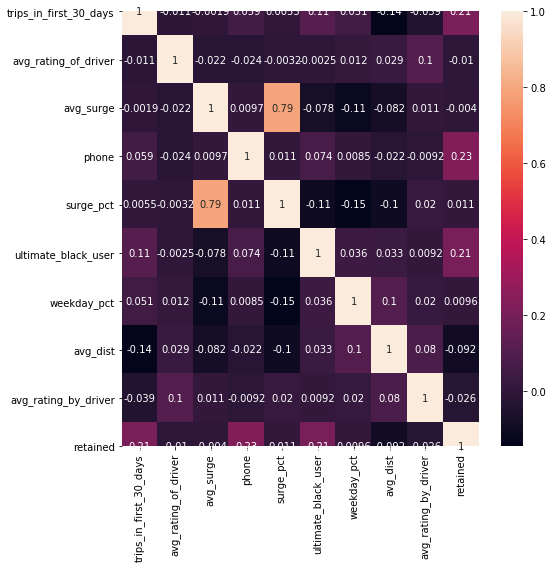

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

avg_surge is highly correlated with surge_pct. It could be dropped as a feature.

In [19]:
df = pd.get_dummies(df, prefix='is')
X, y = df.drop(['retained', 'avg_surge'], axis=1), df['retained']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.20, stratify=y)

In [21]:
classifier = RandomForestClassifier(verbose=True, n_estimators=200)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished


0.7599032355609313

The random forest classifier has achieved an accuracy of 76%.

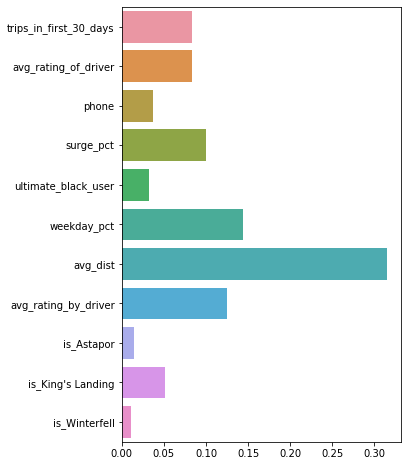

In [22]:
plt.figure(figsize=(5,8))
sns.barplot(y=X.columns, x=classifier.feature_importances_)

 In order to maximise customer retention in can be clearly seen that the rider who has travelled alot by the service comes out as the most obvious explanation of the users that were retained. The company should provide extra incentives to retain such users. 
 
The next most important feature turns out to be trips taken during the weekdays. The company could figure out a way to increase rides and provide better services during weekdays.

Do a market research for the king's landing area to figure out what can be done to increase customers there.